In [1]:
import sys
import os

%matplotlib inline
    
from smfret_analysis import print_info, Plotter

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
print_info()

smFRET analysis software version 1.0.dev
Output version 7
Using sdt-python version 13.0.dev


In [4]:
p = Plotter(data_dir="data")

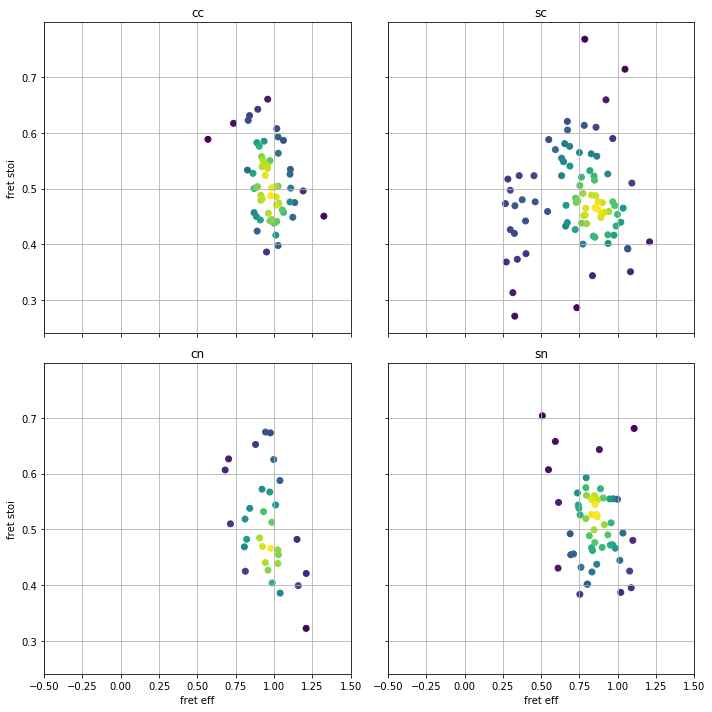

In [5]:
p.scatter(frame=1, xlim=(-0.5, 1.5));

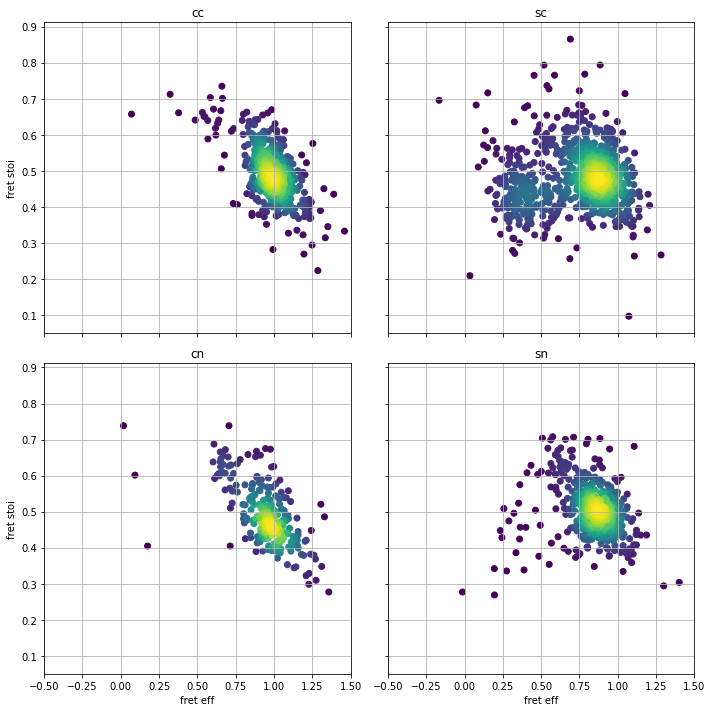

In [6]:
p.scatter(frame=None, xlim=(-0.5, 1.5));

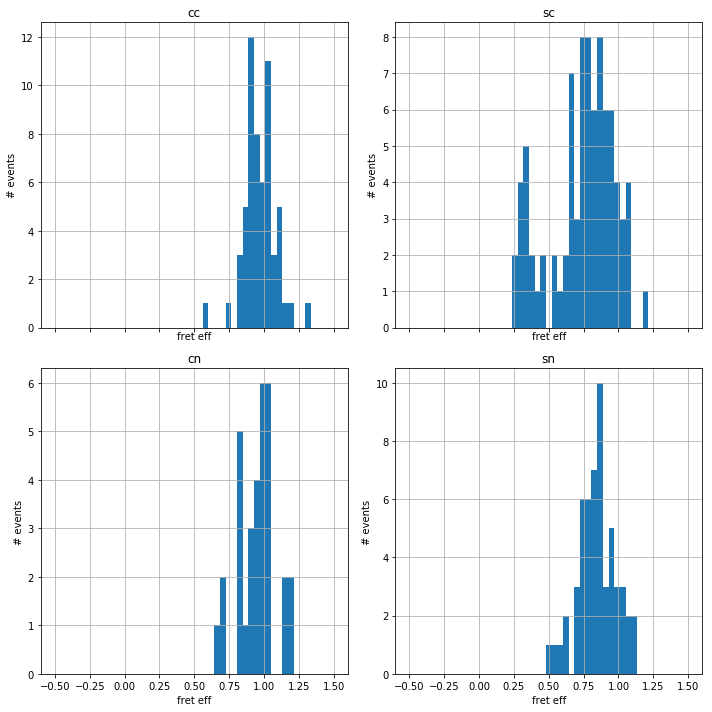

In [7]:
p.hist(frame=1);

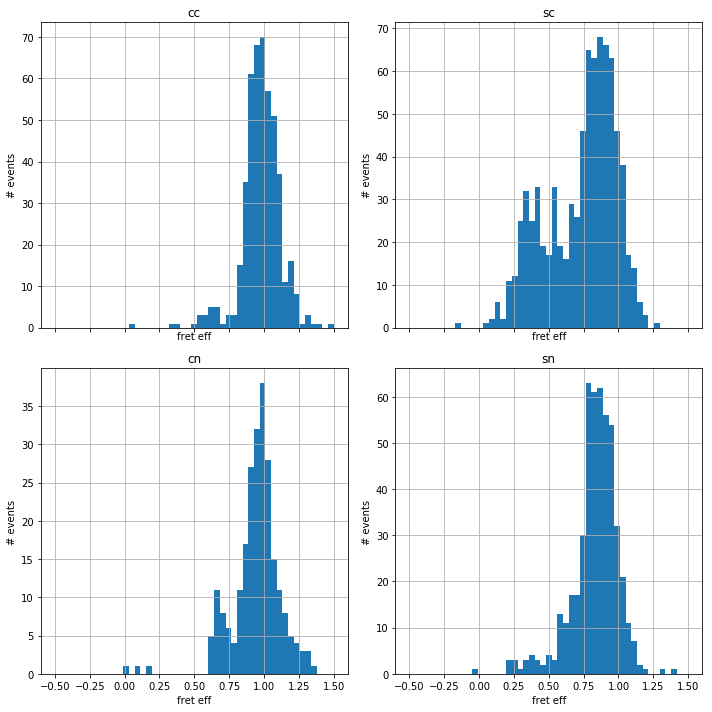

In [8]:
p.hist();